# Making Business Decisions Based On Data Project

## Table of Contents

* [Project Description](#description)
* [Step 1. Open the data file and study the general information](#step_1)
    * [Conclusion](#conclusion_1)
* [Step 2. Data Processing](#step_2)
    * [Conclusion](#conclusion_1)
* [Step 3. Data Analyses](#step_3)
    * [Part 1](#step_3_1)
    * [Part 2](#step_3_2)
    * [Conclusion](#step_3_3)

## Project Description<a class="anchor" id="description"></a>
The main goal of this project is to select the best hypothesis among several options that may order to boost revenue and analyze the results of the A/B test.

In the first part of the project, we have data that consist of nine hypotheses along with their own `reach`, `impact`, `confidence` and `effort` scores. Using the ICE and RICE methods, we will rank them and see which hypothesis should be prioritized.

In the second part, we will work with two outcomes of an A/B test; sales record data and user's visit log. Both datasets consist of the A/B group where a user belongs to. We will evaluate the conversion rates, average order sizes, see how one group performs compared to the other, check their statistical significance, and in the end, decide if we should stop or continue the test.



## Step 1: Open the data file and study the general information<a class="anchor" id="step_1"></a>

In [1]:
%autosave 60

In [2]:
# Loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats
import seaborn as sns

In [3]:
# Loading the datasets
try:
    hypotheses = pd.read_csv('/Users/wpersadha/Documents/Practicum100/08_making_business_decisions/datasets/hypotheses_us.csv', sep=';')
    orders = pd.read_csv('/Users/wpersadha/Documents/Practicum100/08_making_business_decisions/datasets/orders_us.csv')
    visits = pd.read_csv('/Users/wpersadha/Documents/Practicum100/08_making_business_decisions/datasets/visits_us.csv')
except:
    hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
    orders = pd.read_csv('/datasets/orders_us.csv')
    visits = pd.read_csv('/datasets/visits_us.csv')

In [4]:
# Loading dataframe
pd.set_option('max_colwidth', 400)
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [5]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [6]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null float64
group            1197 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 183.6 KB


In [7]:
orders.describe(include='all')

,transactionId,visitorId,date,revenue,group
count,1.197000e+03,1.197000e+03,1197,1197.000000,1197
unique,NaN,NaN,31,NaN,2
top,NaN,NaN,2019-08-05,NaN,B
freq,NaN,NaN,48,NaN,640
mean,2.155621e+09,2.165960e+09,NaN,131.491646,NaN
std,1.229085e+09,1.236014e+09,NaN,603.004729,NaN
min,1.062393e+06,5.114589e+06,NaN,5.000000,NaN
25%,1.166776e+09,1.111826e+09,NaN,20.800000,NaN
50%,2.145194e+09,2.217985e+09,NaN,50.200000,NaN
75%,3.237740e+09,3.177606e+09,NaN,130.400000,NaN


In [8]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null object
group     62 non-null object
visits    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 8.7 KB


In [10]:
visits.describe(include='all')

,date,group,visits
count,62,62,62.000000
unique,31,2,NaN
top,2019-08-19,A,NaN
freq,2,31,NaN
mean,NaN,NaN,607.290323
std,NaN,NaN,114.400560
min,NaN,NaN,361.000000
25%,NaN,NaN,534.000000
50%,NaN,NaN,624.500000
75%,NaN,NaN,710.500000


## Conclusion<a class="anchor" id="conclusion_1"></a>

We have opened the datasets for this project. They consist of one table with lists of hypotheses along with `reach`, `impact`, `confidence`, and `effort` scores, the table orders which has sales and revenue data and visits which consist of how many visits users from each observation group made at a particular day.

## Step 2: Data Processing<a class="anchor" id="step_2"></a>

**Processing `hypotheses` dataset**

In [11]:
# Changing column titles into lower case
hypotheses.columns = [title.lower() for title in hypotheses.columns]

**Processing `orders` dataset**

In [12]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [13]:
# Checking the statistical summary
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null float64
group            1197 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 183.6 KB


In [14]:
# Converting datetime object data type
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [15]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null float64
group            1197 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 114.7 KB


In [16]:
orders.describe(include='all')

,transactionId,visitorId,date,revenue,group
count,1.197000e+03,1.197000e+03,1197,1197.000000,1197
unique,NaN,NaN,31,NaN,2
top,NaN,NaN,2019-08-05 00:00:00,NaN,B
freq,NaN,NaN,48,NaN,640
first,NaN,NaN,2019-08-01 00:00:00,NaN,NaN
last,NaN,NaN,2019-08-31 00:00:00,NaN,NaN
mean,2.155621e+09,2.165960e+09,NaN,131.491646,NaN
std,1.229085e+09,1.236014e+09,NaN,603.004729,NaN
min,1.062393e+06,5.114589e+06,NaN,5.000000,NaN
25%,1.166776e+09,1.111826e+09,NaN,20.800000,NaN


The `orders` data set consist of 1197 rows and having four columns, `transactionId`, `visitorId`, `date`, `revenue`, `group`. The data spans for the entire month of August 2019. It is interesting to see the statistical summary of the `revenue` column. The data has a wide span, from 5 to 19920. The median (50.2) is also on the left side of the mean (131.49). These are indications of right-skewed distribution, which can also visually seen on the histogram below.

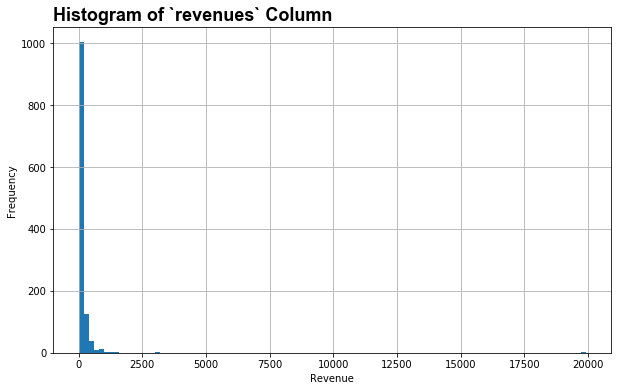

In [17]:
plt.figure(figsize=(10,6))
orders['revenue'].hist(bins=100)
plt.title('Histogram of `revenues` Column',
          loc='left', fontsize=18, fontname='arial', fontweight='bold')
plt.ylabel('Frequency')
plt.xlabel('Revenue')
plt.show()

In [18]:
print('The number of missing values are:\n{}'.format(orders[orders.isna()].sum()))
print()
print('The number of duplicates are:\n{}'.format(orders[orders.duplicated()].sum()))

The number of missing values are:
transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64

The number of duplicates are:
transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64


**Processing `visits` dataset**

In [19]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null object
group     62 non-null object
visits    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 8.7 KB


In [20]:
# Converting datetime object data type
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

# Converting `visits` columns into `int16` data type
visits['visits'] = visits['visits'].astype('int16')
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [21]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null datetime64[ns]
group     62 non-null object
visits    62 non-null int16
dtypes: datetime64[ns](1), int16(1), object(1)
memory usage: 4.7 KB


In [22]:
visits.describe(include='all')

,date,group,visits
count,62,62,62.000000
unique,31,2,NaN
top,2019-08-02 00:00:00,A,NaN
freq,2,31,NaN
first,2019-08-01 00:00:00,NaN,NaN
last,2019-08-31 00:00:00,NaN,NaN
mean,NaN,NaN,607.290323
std,NaN,NaN,114.400560
min,NaN,NaN,361.000000
25%,NaN,NaN,534.000000


The data has 62 rows with three columnns `date`, `group`, and `visits`. The test perfomed in a span of one month from 1-31 August 2019. The visits columns has a minimum value of 361 and maximum value 0f 770. The median (624) is realtively close to the mean (607). We can see the distribution from the histrogram below. 

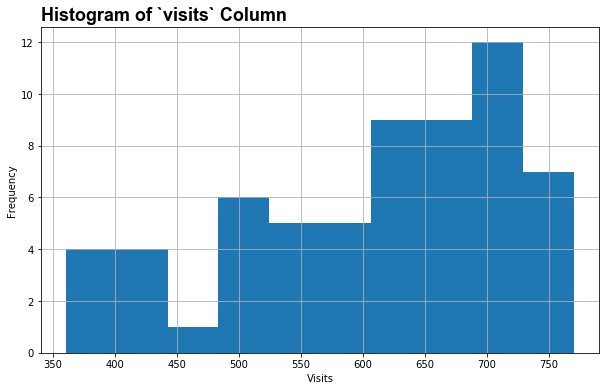

In [23]:
plt.figure(figsize=(10,6))
visits['visits'].hist()
plt.title('Histogram of `visits` Column',
          loc='left', fontsize=18, fontname='arial', fontweight='bold')
plt.ylabel('Frequency')
plt.xlabel('Visits')
plt.show()

In [24]:
# Checking for missing values
print('The number of missing values are:\n{}'.format(visits[visits.isna()].sum()))
print()
print('The number of duplicates are:\n{}'.format(visits[visits.duplicated()].sum()))

The number of missing values are:
date      0.0
group     0.0
visits    0.0
dtype: float64

The number of duplicates are:
date      0.0
group     0.0
visits    0.0
dtype: float64


## Conclusion<a class="anchor" id="conclusion_2"></a>
This section checked if there are missing values and duplicates in the `orders` and `visits` dataset. We converted the `date` columns data types into the format we needed for our analysis. We have also checked how samples in `revenues` and `visits` are right-skewed.

## Step 3: Data Analysis<a class="anchor" id="step_3"></a>

### Part 1. Prioritizing Hypotheses<a class="anchor" id="step_3_1"></a>

We are given nine hypotheses that may help to boost revenue. Using the ICE and RICE methods we are going to determine which hypothesis that needs to be prioritized.

In [25]:
hypotheses.head()

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1


In [77]:
# Calculating the ICE scores and sorting the values
hypotheses['ICE'] = (hypotheses['impact'] * hypotheses['confidence'])/hypotheses['effort']

hypotheses.sort_values(by='ICE', ascending=False)

,level_0,index,hypothesis,reach,impact,confidence,effort,ICE,RICE,ice_rank,rice_rank
8,8,8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2,0,4
0,0,0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0,1,3
7,7,7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0,2,0
6,6,6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0,3,2
2,2,2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0,4,1
1,1,1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0,5,7
5,5,5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0,6,6
3,3,3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0,7,5
4,4,4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0,8,8


In [78]:
# Calculating the RICE score and sorting the values
hypotheses['RICE'] = (hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence'])/hypotheses['effort']

hypotheses.sort_values(by='RICE', ascending=False)

,level_0,index,hypothesis,reach,impact,confidence,effort,ICE,RICE,ice_rank,rice_rank
7,7,7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0,2,0
2,2,2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0,4,1
0,0,0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0,1,3
6,6,6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0,3,2
8,8,8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2,0,4
3,3,3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0,7,5
1,1,1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0,5,7
5,5,5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0,6,6
4,4,4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0,8,8


_'Launching promotion ...'_ gets the first place using the ICE measurement since we consider this strategy will have an immediate impact on customers; anyone will be pleased to get a discount (Score: 9). We also have high confidence that this will successfully bring revenue, perhaps based on previous experience or a separate study. The effort is moderate compared to others. In total, the hypothesis got the top score of 16.2. However, if we consider the reach parameter in the RICE method, this hypothesis drops into fifth place.  Not many users have a birthday on any given day, so the Reach score is the lowest. 

How we define the Reach parameter will affect how a hypothesis behaves under the ICE  and RICE method. A hypothesis with a moderate impact can bring more effect if it can reach a broader audience. This is the case of the hypothesis _'Add a subscription form to all the main pages. This will help you compile a mailing list'_ which gets 3rd place under the ICE method but moved up as the top priority under the RICE method. By placing it on every page, we ensure higher visibility of the subscription form to the customer. As a result, we can set the Reach parameter to 10, which gave this hypothesis the most significant score.

Another interesting example is the second place hypothesis under the ICE. Adding two new channels gives us the highest impact score of 10 since more traffic means more visitors to the site. However, this strategy only targets new potential customers. Customers who already subscribed to our service will most likely use the same channel they already familiar with. Hence we assign 3 as the Reach parameter and send this hypothesis to the third place.

As a summary, the Reach parameter gives us an instrument to fine-tune our decision-making process.

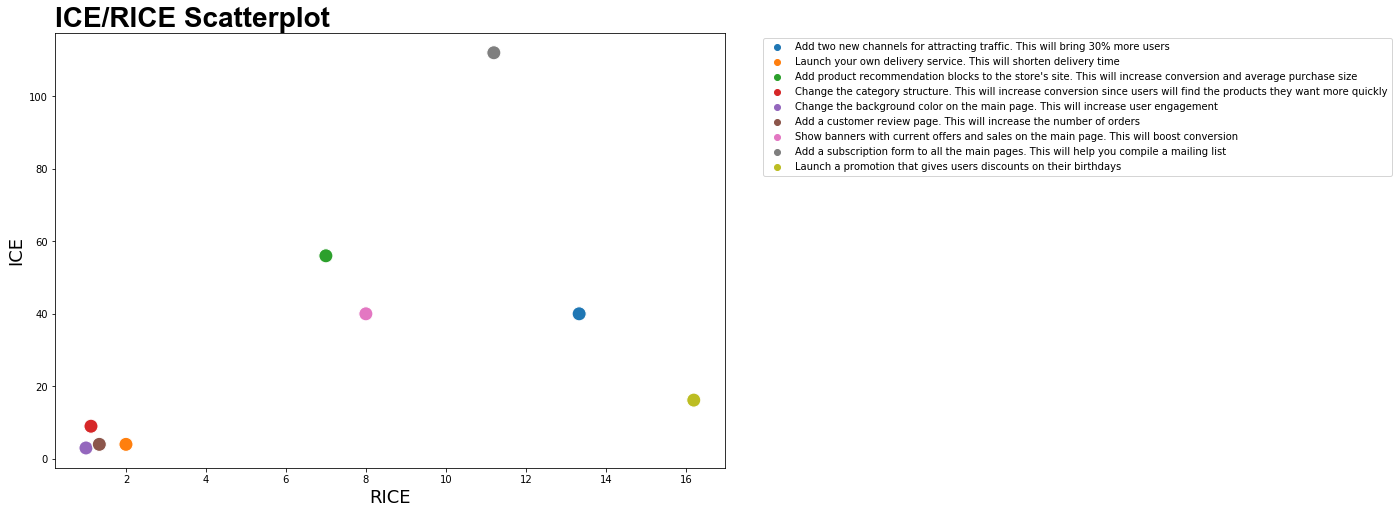

In [29]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=hypotheses, x='ICE', y='RICE', hue='hypothesis', s=200)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('ICE/RICE Scatterplot',
          loc='left', fontsize=28, fontname='arial', fontweight='bold')
plt.ylabel('ICE', fontsize=18)
plt.xlabel('RICE', fontsize=18)
plt.show()

The scatter plot helps us to identify the rank of each hypothesis. The more to the right a hypothesis is, the higher its priority in the ICE method. Likewise, the higher a hypothesis, the higher its rank in the RICE method. We want to find a hypothesis that is located as close to the top right corner as possible.

In [30]:
# Finding the rank of hypotheses based on ICE and RICE
ice_sorted = hypotheses['ICE'].sort_values(ascending=False).reset_index()
ice_ranked = ice_sorted.reset_index()[['level_0', 'index']]
ice_ranked.columns = ['ice_rank', 'index']

rice_sorted = hypotheses['RICE'].sort_values(ascending=False).reset_index()
rice_ranked = rice_sorted .reset_index()[['level_0', 'index']]
rice_ranked.columns = ['rice_rank', 'index']

hypotheses = pd.merge(hypotheses.reset_index(), ice_ranked, right_on='index', left_on='index')
hypotheses = pd.merge(hypotheses.reset_index(), rice_ranked, right_on='index', left_on='index')

hypotheses.head()

,level_0,index,hypothesis,reach,impact,confidence,effort,ICE,RICE,ice_rank,rice_rank
0,0,0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0,1,3
1,1,1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0,5,7
2,2,2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0,4,1
3,3,3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0,7,5
4,4,4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0,8,8


In [31]:
# Selecting required columns
hyp = hypotheses[['index', 'ice_rank', 'rice_rank']]
hyp.columns = ['index', 'ICE', 'RICE']

# Setting index then stacking the remaining columns
hyp = hyp.set_index('index')
hyp_stacked = hyp.stack()

# Turning the series into a dataframe
hyp_df = pd.DataFrame(hyp_stacked)

# Restting index then renaming columns
hyp_df = hyp_df.reset_index()
hyp_df.columns = ['hypothesis', 'method', 'rank']

hyp_df.head()

,hypothesis,method,rank
0,0,ICE,1
1,0,RICE,3
2,1,ICE,5
3,1,RICE,7
4,2,ICE,4


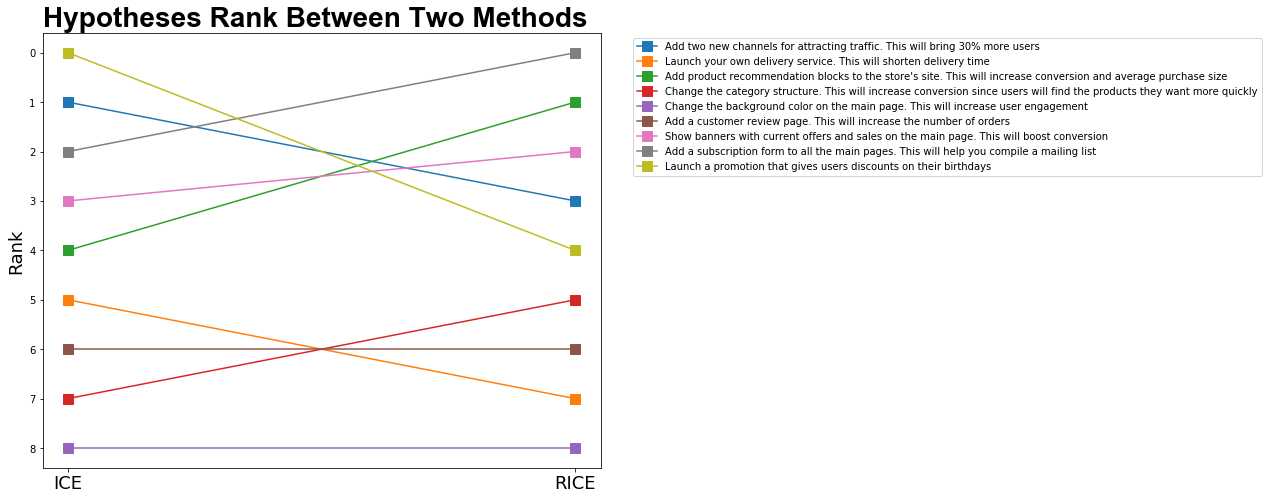

In [32]:
# Creating the slope plot
fig, ax = plt.subplots(1, figsize=(10,8))
for i in range(9):
    temp = hyp_df[hyp_df['hypothesis'] == i]
    plt.plot(temp['method'], 
             temp['rank'], 
             marker='s', 
             markersize=10, 
             label=hypotheses['hypothesis'][i])
      
plt.gca().invert_yaxis()    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Rank', fontsize=18)
plt.title('Hypotheses Rank Between Two Methods',
          loc='left', fontsize=28, fontname='arial', fontweight='bold')
plt.xticks(fontsize=18,)
plt.show()



The above plot shows how a hypothesis may be given different priorities depending on the method we used to measure them. The top priority on the ICE method became the 5th place on the RICE method. Likewise, the 2nd priority of ICE turned out to be the top on RICE.

### Part 2. A/B Test Analysis<a class="anchor" id="step_3_2"></a>

We are given several tasks which also lays out the steps that need to be taken to conduct an A/B Testing. The tasks are as follows:


**1. Graph cumulative revenue by group. Make conclusions and conjectures.**

In [33]:
# Finding the number of users that enteres two test groups simultaneously
print('The number of users that are in both groups: {}'
      .format((orders.groupby(['visitorId', 'date']).count()['group'] > 1).sum()))

The number of users that are in both groups: 41


In [34]:
# Finding the users
usersInBothGroups = (orders
                    .groupby(['visitorId', 'date'])
                    .count().reset_index()
                    .query('group > 1')['visitorId']
                    )
usersInBothGroups.head()

56     232979603
61     237748145
131    457167155
141    477780734
168    611059232
Name: visitorId, dtype: int64

In [35]:
# Finding unique order dates for each group
datesGroups = orders[['date', 'group']].drop_duplicates()
datesGroups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Creating an aggregate table that shows:
- the number of distinct orders for the test groups up to the specified date (inclusive)
- the number of distinct users in the test groups that put at least one order up to the specified date (inclusive)
- total revenue from orders in the test groups up to the specifued date (inclusive)

In [36]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [37]:
# Creating an aggregate table that shows 
ordersAggregated = (datesGroups
                    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                                           orders['group'] == x['group'])]
                          .agg({'date':'max',
                                'group':'max',
                                'transactionId': pd.Series.nunique,
                                'visitorId': pd.Series.nunique,
                                'revenue':'sum'}), axis=1)
                    .sort_values(by=['date', 'group'])                   
                   )
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,2356.8
66,2019-08-01,B,21,20,1620.0
175,2019-08-02,A,44,38,3860.3
173,2019-08-02,B,45,43,4243.8
291,2019-08-03,A,68,62,5675.5


Creating an aggregate table to show:
- the date
- the A/B group
- the number of distinct visitorsd in the test group up to the specified date (inclusive)

In [38]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [39]:
visitsAggregated = (datesGroups
                      .apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'],
                                                             visits['group'] == x['group'])]
                           .agg({'date':'max',
                                 'group':'max',
                                 'visits':'sum'}), axis=1)
                      .sort_values(by=['date', 'group'])
                     )
visitsAggregated.head()

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Merging the aggregate dataframe by `date` dan `group`,

In [40]:
cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845


Separating the cumulative table into group `A` and group `B`,

In [41]:
# Separating table into group A
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueA.head()

,date,revenue,orders
0,2019-08-01,2356.8,24
2,2019-08-02,3860.3,44
4,2019-08-03,5675.5,68
6,2019-08-04,6822.1,84
8,2019-08-05,8810.2,109


In [42]:
# Separating table into group B
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]
cumulativeRevenueB.head()

,date,revenue,orders
1,2019-08-01,1620.0,21
3,2019-08-02,4243.8,45
5,2019-08-03,6050.6,61
7,2019-08-04,7767.9,78
9,2019-08-05,9262.9,101


/Users/wpersadha/opt/anaconda3/envs/practicum/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


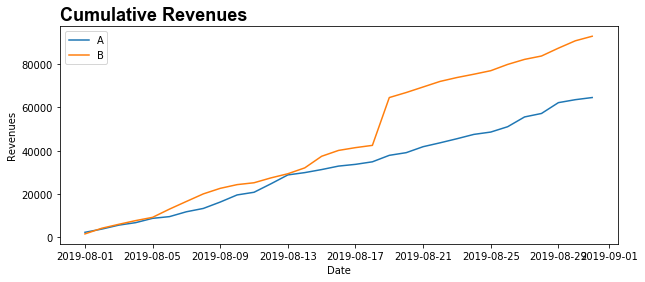

In [43]:
plt.figure(figsize=(10,4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()

plt.title('Cumulative Revenues', loc='left', fontsize=18, fontname='arial', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Revenues')
plt.show()


The two groups' revenues were the same size initially,  though, starting from August 5, 2019, Group B's got slightly larger. The line seemed to be somewhat flattened around mid of August, but the abrupt change around August 17 made Group B's revenue significantly larger. We will evaluate later whether outliers caused this sudden surge.

**2. Graph cumulative average order size by group. Make conclusions and conjectures.**

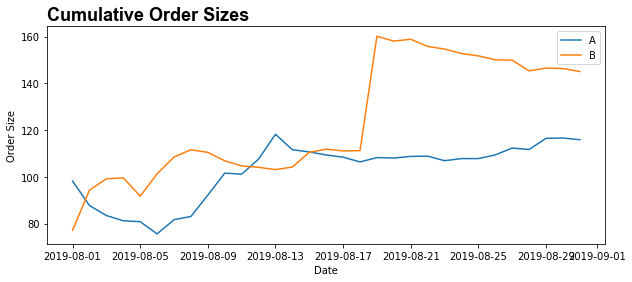

In [44]:
# Plot cumulative graphs (by day) for average purchase size. 
plt.figure(figsize=(10,4))
plt.plot(cumulativeRevenueA['date'], 
         cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], 
         label='A')

plt.plot(cumulativeRevenueB['date'], 
         cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], 
         label='B')
plt.legend()

plt.title('Cumulative Order Sizes', loc='left', fontsize=18, fontname='arial', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Order Size')
plt.show()


In general, Grup B's average order size was larger than Group A's. However, in the end, Group A's seemed going to getting higher than B's had the sudden increase in B did not take place. Similar to in the revenue chart, this abrupt change might be caused by outliers. 

**3. Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.**

We can determine the relative difference by comparing the cumulative order size between the two groups.

First, we need to merge the two tables,

In [45]:
# Merging tables
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date', 
                                                   right_on='date',
                                                   suffixes=['A', 'B'])

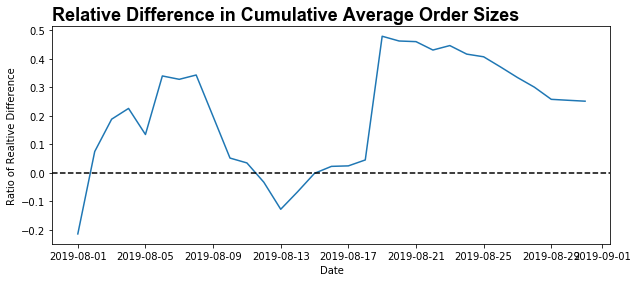

In [46]:
# Calculating the relative differences
averageOrderA = mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA']
averageOrderB = mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB']

plt.figure(figsize=(10,4))
plt.plot(mergedCumulativeRevenue['date'], 
         averageOrderB/
        (averageOrderA)-1)

plt.axhline(y=0, color='black', linestyle='--')

plt.title('Relative Difference in Cumulative Average Order Sizes',
          loc='left', fontsize=18, fontname='arial', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Ratio of Realtive Difference')
plt.show()


The average order size of Group B fluctuates over A for the given period. Group B's was significantly larger initially, and if it were not because of the sudden shift, Group B's average order size would have been lower than A's. As we have mentioned above, the presence of outliers could lead us to a false conclusion.

**4. Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.**

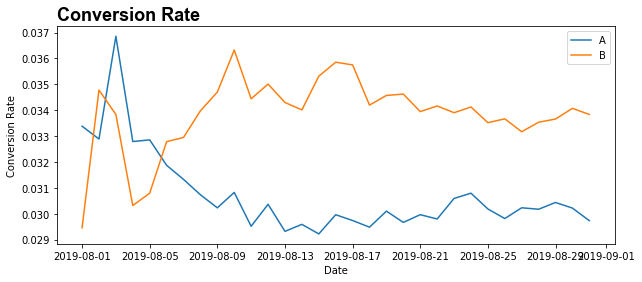

In [47]:
# Calculating the conversion rates
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# Splitting the data into groups
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# Plotting the graphs
plt.figure(figsize=(10,4))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.legend()

plt.title('Conversion Rate', loc='left', fontsize=18, fontname='arial', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.show()



In general, users in Group B have a higher conversion rate than A. The fluctuations at the start of the month were caused by users who put a high number of orders.

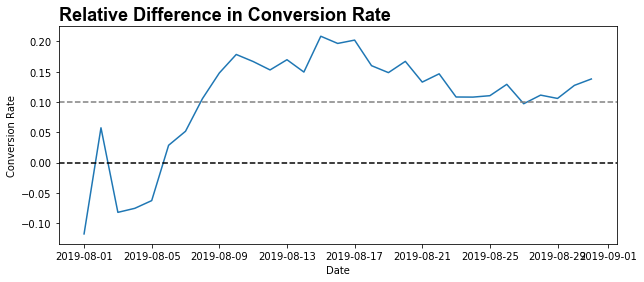

In [48]:
# Calculating the relative difference between conversion rates
mergedCumulativeConversions = (cumulativeDataA[['date','conversion']]
                               .merge(cumulativeDataB[['date','conversion']], 
                                      left_on='date', 
                                      right_on='date', 
                                      how='left', 
                                      suffixes=['A', 'B']))

plt.figure(figsize=(10,4))
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Relative gain in conversion in group B as opposed to group A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')

plt.title('Relative Difference in Conversion Rate', loc='left', fontsize=18, fontname='arial', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.show()


The plot above shows that group B's conversion rate is at least 10% higher than A's. 

**5. Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.**

We will evaluate how many orders a  typical customer made and visually see any anomaly present. 

In [49]:
# Creating a small table that groups unique orders by userId 
ordersByUsers = (orders
                .drop(['revenue', 'date'], axis=1)
                .groupby('visitorId', as_index=False)
                .agg({'transactionId': pd.Series.nunique,
                      'group': max})
               )

# Showing ten users with the highest order
ordersByUsers.columns = ['userId', 'orders', 'group']
print(ordersByUsers
      .sort_values(by='orders', ascending=False)
      .head(10)
     )

          userId  orders group
1023  4256040402      11     B
591   2458001652      11     B
569   2378935119       9     B
487   2038680547       8     B
44     199603092       5     B
744   3062433592       5     B
55     237748145       5     B
917   3803269165       5     B
299   1230306981       5     B
897   3717692402       5     B


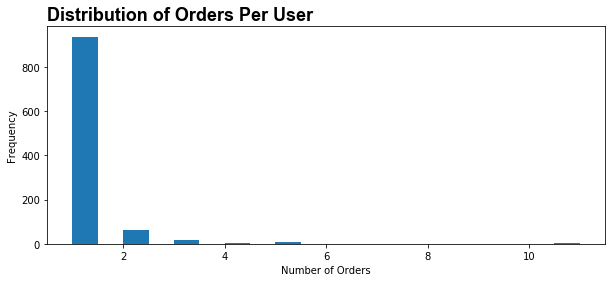

In [50]:
plt.figure(figsize=(10,4))
plt.hist(ordersByUsers['orders'], bins=20)

plt.title('Distribution of Orders Per User', loc='left', fontsize=18, fontname='arial', fontweight='bold')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.show()


As shown above, most users (91% of them) made only one order, six of them placed two orders, and the rest (3%) had made more than three orders.

In [51]:
# The proportion of number of orders per users in the data
ordersByUsers['orders'].value_counts()*100/len(ordersByUsers['orders'])

1     90.882638
2      6.207565
3      1.648885
5      0.581959
4      0.290980
11     0.193986
9      0.096993
8      0.096993
Name: orders, dtype: float64

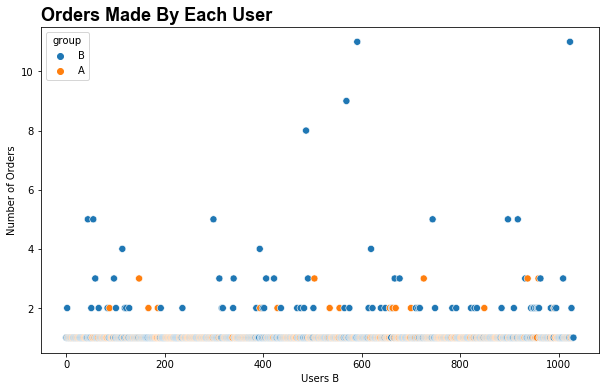

In [53]:
# Plot a histogram using the scatter() method
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(10,6))
sns.scatterplot(data=ordersByUsers, x=x_values, y = 'orders', hue='group', s=50)
plt.title('Orders Made By Each User', loc='left', fontsize=18, fontname='arial', fontweight='bold')
plt.xlabel('Users B')
plt.ylabel('Number of Orders')
plt.show()

in the scatterplot above that most users only had one order. However few users made two, three, four, even eleven orders. We can claim these users' order size as outliers since their numbers are significantly smaller than the rest of the group population. We will determine the maximum number of orders a user can make before considering them as an outlier in the next point.

**6. Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.**

In [54]:
# Calculate the 90th, 95th, and 99th sample percentiles 
print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

[1. 2. 4.]


Ninety percent of the users only put in one order, and ninety-five percent made no more than two. If we use the 5% confidence test in our hypothesis testing stage, we can set the outlier threshold at three. All users that have three or more orders are considered outliers.

**7. Plot a scatter chart of order prices. Make conclusions and conjectures.**

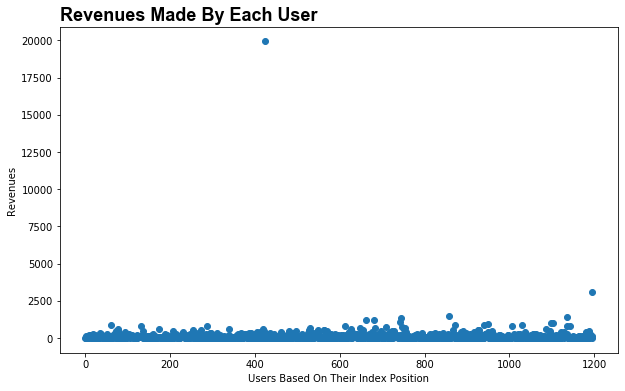

In [55]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(10,6))
plt.scatter(x_values, orders['revenue'])

plt.title('Revenues Made By Each User', loc='left', fontsize=18, fontname='arial', fontweight='bold')
plt.xlabel('Users Based On Their Index Position')
plt.ylabel('Revenues')
plt.show()

In the same fashion, we can visually examine how the size of revenues each user made, and as we can see, there are two clear outliers shown.

**8. Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.**

In [56]:
# Calculate the 90th, 95th, and 99th sample percentiles 
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[282.48  435.54  900.904]


Ninety percent made at least 282.48 of revenues, while ninety-five of them made 435.54 or less, and ninety-nine percent made 900 or less. We will set the outlier threshold for the revenues to 450 and above.

**9. Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.**

In [57]:
# Calculating statistical significance of user's conversion
ordersByUsersA = (orders[orders['group']=='A']
                  .groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique}))
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (orders[orders['group']=='B']
                  .groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique}))
ordersByUsersB.columns = ['userId', 'orders']

sampleA = (pd.concat([ordersByUsersA['orders'],
                      pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - 
                                                   len(ordersByUsersA['orders'])), name='orders')],axis=0))

sampleB = (pd.concat([ordersByUsersB['orders'],
                      pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - 
                                                   len(ordersByUsersB['orders'])), name='orders')],axis=0))



Before performing the hypothesis test, we need to check sampleA and sampleB distributions to determine which statistical test to use.

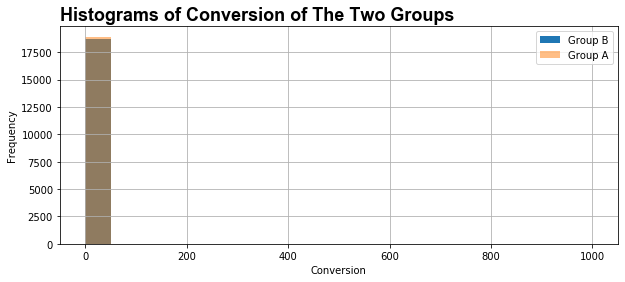

In [58]:
# Evaluating the sample distribution
plt.figure(figsize=(10,4))
sampleA.hist(bins=20, alpha=1, range=(0,1000), label='Group B')
sampleB.hist(bins=20, alpha=0.5, range=(0,1000), label='Group A')
plt.legend()

plt.title('Histograms of Conversion of The Two Groups', 
          loc='left', fontsize=18, fontname='arial', fontweight='bold')
plt.xlabel('Conversion')
plt.ylabel('Frequency')
plt.show()

The histogram shows that both samples are right-skewed with roughly 97% at `0` values. For this reason, we choose the Mann-Whitney U Rank Test since the test does not assume any distribution, unlike the traditional Student's T-test, where it requires normally distributed samples.

In [59]:
# Distribution of sample A
sampleA.value_counts()/len(sampleA)

0    0.973153
1    0.025246
2    0.000907
3    0.000374
4    0.000160
5    0.000107
7    0.000053
Name: orders, dtype: float64

In [60]:
# Distribution of sample B
sampleB.value_counts()/len(sampleB)

0    0.969021
1    0.029182
2    0.001216
3    0.000264
4    0.000211
6    0.000053
5    0.000053
Name: orders, dtype: float64

In [61]:
print("P-value: {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("The relative difference: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

P-value: 0.00840
The relative difference: 0.138


For the hypothesis testing, we set the confidence level, $\alpha = 0.05$ and express the following assumptions:

- Null hypothesis, $H_0$: There are no differences between the average mean of conversion between Group A and B using the raw data ($\mu_A = \mu_B$)
- Alternate hypothesis, $H_A$: The average mean of Group A's conversion is different than the average mean of Group B's conversion ($\mu_A \neq \mu_B$)

The p-value is smaller than $\alpha$ hence we can say that we have enough evidence to reject the null hypothesis, $H_0$ and claim that the average mean of conversion between the two groups are different. 

Group B's relative conversion is 13% higher than Group A's. However, this result is still based on the raw data. We will see if outliers brought any effects. 

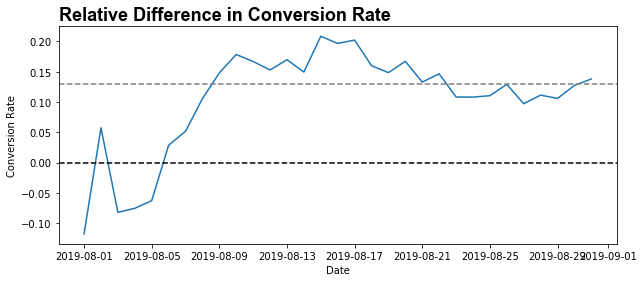

In [62]:
# Recall the previous relative difference plot
plt.figure(figsize=(10,4))
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Relative gain in conversion in group B as opposed to group A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.13, color='grey', linestyle='--')

plt.title('Relative Difference in Conversion Rate', loc='left', fontsize=18, fontname='arial', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.show()


We recall the relative difference plot made earlier, which shows that Group B's conversion rate is 13% higher than that of A's.

**10. Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.**

As discussed earlier, the distribution of revenues is right-skewed. Furthermore, we can split the revenue data into their group and compare the distributions shown on the histogram below. Both distributions are right-skewed.

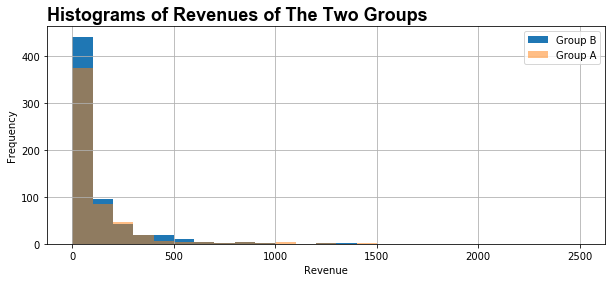

In [63]:
# Evaluating the sample distribution
plt.figure(figsize=(10,4))
orders[orders['group']=='B']['revenue'].hist(bins=25, alpha=1, range=(0,2500), label='Group B')
orders[orders['group']=='A']['revenue'].hist(bins=25, alpha=0.5, range=(0,2500), label='Group A')
plt.legend()

plt.title('Histograms of Revenues of The Two Groups', loc='left', fontsize=18, fontname='arial', fontweight='bold')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

For that reason, we will check the statistical significance of the average order size using the  Mann-Whitney Rank Test.

In [64]:
#  the statistical significance of the difference in average order size between the groups.

print('P-value: {0:.3f}'
      .format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                 orders[orders['group']=='B']['revenue'])[1]))
print('The relative difference: {0:.3f}'
      .format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.346
The relative difference: 0.252


Similarly, for this hypothesis testing, we set the confidence level, $\alpha = 0.05$ and express the following assumptions:

- Null hypothesis, $H_0$: There are no differences between the average mean of order size between Group A and B using the raw data ($\mu_A = \mu_B$)
- Alternate hypothesis, $H_0$: The average mean of Group A's order size is different than the average mean of Group B's conversion ($\mu_A \neq \mu_B$)

The p-value is greater than $\alpha$ hence we say that there is not enough evidence to reject the null hypothesis, $H_0$, the average mean of order size between the two groups is the same. 

The relative difference between the two groups is 25%. We have to pay attention to this result as 25%  is a significant difference, and saying that the average means between the two groups are the same is somewhat questionable. We need to reevaluate the hypothesis using a clean dataset by removing the outliers.

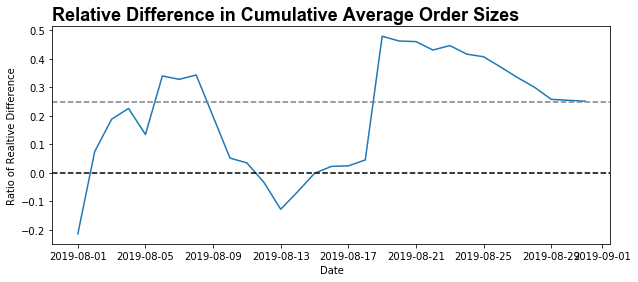

In [65]:
# Calculating the relative differences
plt.figure(figsize=(10,4))
plt.plot(mergedCumulativeRevenue['date'], 
         averageOrderB/
        (averageOrderA)-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.25, color='grey', linestyle='--')

plt.title('Relative Difference in Cumulative Average Order Sizes',
          loc='left', fontsize=18, fontname='arial', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Ratio of Realtive Difference')
plt.show()

Recall the relative difference in cumulative average order size plot made earlier, which shows that Group B's order is approximately 25% higher than A.

**11. Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.**

Now we will see how outliers affect our previous analysis by removing them from the dataset. First, we need to take out the users who made unusually many orders and expensive orders.

In [66]:
# Finding users with unusually high and expensive orders
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] >= 3]['userId'], 
                                 ordersByUsersB[ordersByUsersB['orders'] >= 3]['userId']], axis = 0)

usersWithExpensiveOrders = orders[orders['revenue'] > 450]['visitorId']

abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0)
                 .drop_duplicates().sort_values())

In [67]:
# Remove the anomalous visitors and calculate the statistical significance of the difference in conversion
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId']
                                                           .isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() 
                                                          - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId']
                                                           .isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() 
                                                          - len(ordersByUsersB['orders'])),name='orders')],axis=0)

print("P-value: {0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

print("The relative difference: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 


P-value: 0.00662
The relative difference: 0.172


In [68]:
sampleAFiltered.value_counts()

0    18233
1      443
2       16
Name: orders, dtype: int64

In [69]:
sampleBFiltered.value_counts()

0    18330
1      520
2       21
Name: orders, dtype: int64

Using the same setup as that of the raw data, we set the confidence level, $\alpha = 0.05$ and express the following assumptions:

- Null hypothesis, $H_0$: There are no differences between the average mean of conversion between Group A and B using the raw data ($\mu_A = \mu_B$)
- Alternate hypothesis, $H_A$: The average mean of Group A's conversion is different than the average mean of Group B's conversion ($\mu_A \neq \mu_B$)

The p-value is still smaller than $\alpha$ despite having a slightly higher value than p-values obtained using the raw data. Therefore we reject the null hypothesis $H_0$since there no enough evidence. The average mean of conversion between the two groups is different. 

By taking out the outliers, we get a higher relative difference of 0.172 from the previous of 0.138.

We can recreate the plots but this time a filtered version by removing the outliers from the datasets,

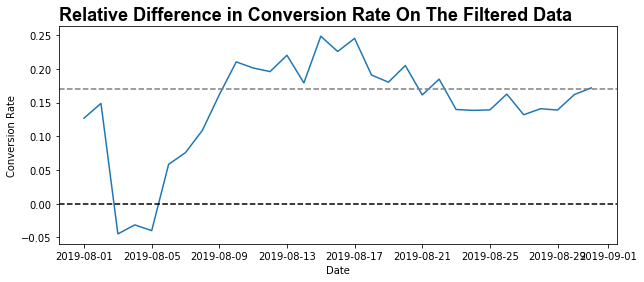

In [70]:
# Creating a cleaned dataset by removing the outliers
filteredOrders = orders[np.logical_not(orders['visitorId'].isin(abnormalUsers))]

# Finding the unique dates for each groups/users
filteredDatesGroup = filteredOrders[['date', 'group']].drop_duplicates()

# Creating the aggregate orders table
filteredOrdersAggregated = (filteredDatesGroup
                    .apply(lambda x: filteredOrders[np.logical_and(filteredOrders['date'] <= x['date'],
                                                           filteredOrders['group'] == x['group'])]
                          .agg({'date':'max',
                                'group':'max',
                                'transactionId': pd.Series.nunique,
                                'visitorId': pd.Series.nunique,
                                'revenue':'sum'}), axis=1)
                    .sort_values(by=['date', 'group'])                   
                   )

# Creating the aggregate visits table
filteredVisitsAggregated = (filteredDatesGroup
                      .apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'],
                                                             visits['group'] == x['group'])]
                           .agg({'date':'max',
                                 'group':'max',
                                 'visits':'sum'}), axis=1)
                      .sort_values(by=['date', 'group'])
                     )

# Creating a cumulative data
filteredCumulativeData = filteredOrdersAggregated.merge(filteredVisitsAggregated, 
                                                        left_on=['date', 'group'], 
                                                        right_on=['date', 'group'])
filteredCumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']



filteredCumulativeRevenueA = filteredCumulativeData[filteredCumulativeData['group'] == 'A'][['date', 
                                                                                             'revenue', 
                                                                                             'orders']]
filteredCumulativeRevenueB = filteredCumulativeData[filteredCumulativeData['group'] == 'B'][['date', 
                                                                                             'revenue', 
                                                                                             'orders']]


# Calculating the new conversion rate
filteredCumulativeData['conversion'] = filteredCumulativeData['orders']/filteredCumulativeData['visitors']

# Splitting the data into groups
filteredCumulativeDataA = filteredCumulativeData[filteredCumulativeData['group']=='A']
filteredCumulativeDataB = filteredCumulativeData[filteredCumulativeData['group']=='B']

# Merging the splitted table
mergedFilteredCumulativeConversions = (filteredCumulativeDataA[['date','conversion']]
                               .merge(filteredCumulativeDataB[['date','conversion']], 
                                      left_on='date', 
                                      right_on='date', 
                                      how='left', 
                                      suffixes=['A', 'B']))

plt.figure(figsize=(10,4))
plt.plot(mergedFilteredCumulativeConversions['date'], 
         mergedFilteredCumulativeConversions['conversionB']/mergedFilteredCumulativeConversions['conversionA']-1, 
         label="Relative gain in conversion in group B as opposed to group A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.17, color='grey', linestyle='--')
plt.title('Relative Difference in Conversion Rate On The Filtered Data', 
          loc='left', fontsize=18, fontname='arial', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.show()

We can see the relative difference in conversion rates performed on the filtered data will yield a result that Group B's conversion rate is 17% higher than A's.

**12. Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.**

In [71]:
# Remove the anomalies and calculate the statistical significance for the difference in average order size.
print('P-value: {0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('Relative difference: {0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',
                          np.logical_not(orders['visitorId']
                                         .isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(orders['group']=='A',
                           np.logical_not(orders['visitorId']
                                          .isin(abnormalUsers)))]['revenue'].mean() - 1))

P-value: 0.388
Relative difference: -0.021


Similarly, for the filtered data of order size, we set the confidence level, $\alpha = 0.05$ and express the following assumptions:

- Null hypothesis, $H_0$: There are no differences between the average mean of order size between Group A and B using the raw data ($\mu_A = \mu_B$)
- Alternate hypothesis, $H_A$: The average mean of Group A's order size is different than the average mean of Group B's conversion ($\mu_A \neq \mu_B$)

The p-value is still greater than $\alpha$ hence we say that there is not enough evidence to reject the null hypothesis, $H_0$, the average mean of order size between the two groups is the same. 

The relative difference, on the other hand, drops drastically from 25% to -0.02%. In other words, now Group B's average mean of orders size is just slightly below that of Group A and agrees more to the outcome of the p-value. 

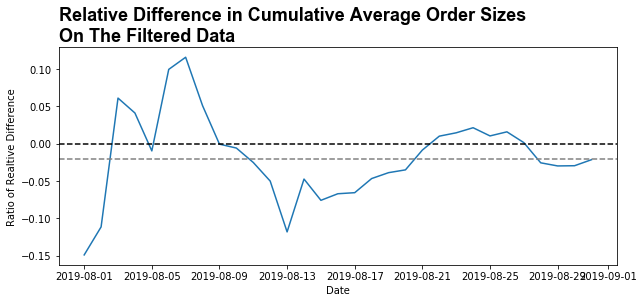

In [72]:
# Combining teo tables
mergedFilteredCumulativeRevenue = filteredCumulativeRevenueA.merge(filteredCumulativeRevenueB, 
                                                   left_on='date', 
                                                   right_on='date',
                                                   suffixes=['A', 'B'])

# Separating into two groups
filteredAverageOrderA = mergedFilteredCumulativeRevenue['revenueA']/mergedFilteredCumulativeRevenue['ordersA']
filteredAverageOrderB = mergedFilteredCumulativeRevenue['revenueB']/mergedFilteredCumulativeRevenue['ordersB']

# Plotting the graph
plt.figure(figsize=(10,4))
plt.plot(mergedFilteredCumulativeRevenue['date'], 
         filteredAverageOrderB/
         filteredAverageOrderA-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.021, color='grey', linestyle='--')

plt.title('Relative Difference in Cumulative Average Order Sizes\nOn The Filtered Data',
          loc='left', fontsize=18, fontname='arial', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Ratio of Realtive Difference')
plt.show()

Plotting the cumulative average order size will give use the chart above. We can see that even though it is now closer to zero, the line is still fluctuating. We cannot come up with any firm conclusion just yet. This is different from the Relative Distance of The Cumulative Revenue plot, where the ratio is always above zero in such a way, we can quickly draw a conclusion.

**13.  Make a decision based on the test results.**

The possible decisions are: 
1. Stop the test, consider one of the groups the leader. 
2. Stop the test, conclude that there is no difference between the groups. 
3. Continue the test.

Based on the conversion rate, we have seen that Group B has a better rate than A, and we have confirmed that statically, the average mean of the conversion between the two groups is different. We can also see from the Cumulative Conversion Rate Table below that the cumulative conversion of both groups has stabilized.

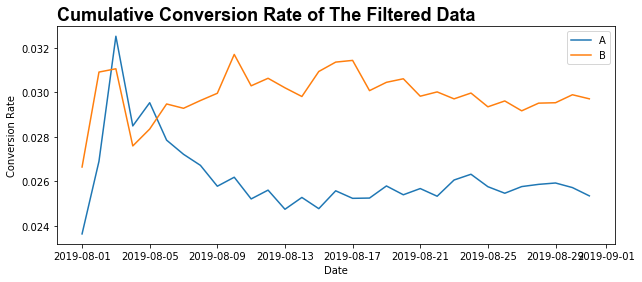

In [73]:
# Plotting the Cumulative Conversion Rate 
filteredCumulativeData['conversion'] = filteredCumulativeData['orders']/filteredCumulativeData['visitors']

# Splitting the data into groups
filteredCumulativeDataA = filteredCumulativeData[filteredCumulativeData['group']=='A']
filteredCumulativeDataB = filteredCumulativeData[filteredCumulativeData['group']=='B']

# Plotting the graphs
plt.figure(figsize=(10,4))
plt.plot(filteredCumulativeDataA['date'], filteredCumulativeDataA['conversion'], label='A')
plt.plot(filteredCumulativeDataB['date'], filteredCumulativeDataB['conversion'], label='B')
plt.legend()

plt.title('Cumulative Conversion Rate of The Filtered Data',
          loc='left', fontsize=18, fontname='arial', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.show()

On the other hand, we have statistically believed that both groups have the same average order size. Removing the outliers also led to a more accurate answer where the difference between the two groups is only 01.2%, where B is on the lower side. However, as we have evaluated above, the ratio of the relative difference between both groups is still fluctuating. We can also back this statement up by looking at the sizes of the cumulative orders of both groups (as shown below) that lines of both Group A and B are still increasing despite in small magnitude,

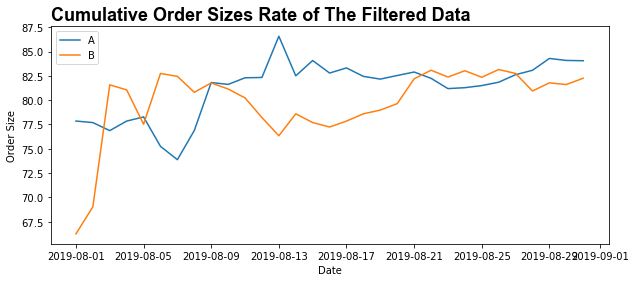

In [74]:
# Plot cumulative graphs (by day) for average order size. 
plt.figure(figsize=(10,4))
plt.plot(filteredCumulativeRevenueA['date'], 
         filteredCumulativeRevenueA['revenue']/filteredCumulativeRevenueA['orders'], 
         label='A')

plt.plot(filteredCumulativeRevenueB['date'], 
         filteredCumulativeRevenueB['revenue']/filteredCumulativeRevenueB['orders'], 
         label='B')
plt.legend()

plt.title('Cumulative Order Sizes Rate of The Filtered Data',
          loc='left', fontsize=18, fontname='arial', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Order Size')
plt.show()

**For that reason, we recommend continuing the test for at least another month to see how the cumulative order size plot behaves.**

Additionally, it is also interesting to see the revenue of both groups after taking out outliers are increasing in a more linear form.

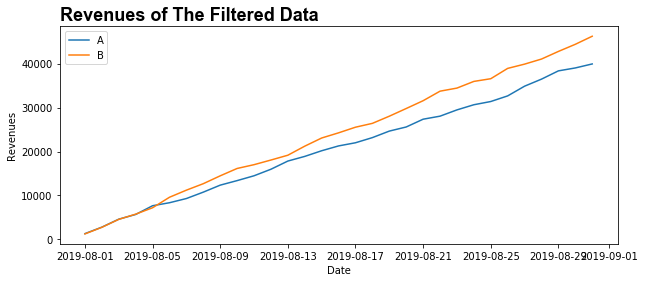

In [75]:
plt.figure(figsize=(10,4))
plt.plot(filteredCumulativeRevenueA['date'], filteredCumulativeRevenueA['revenue'], label='A')
plt.plot(filteredCumulativeRevenueB['date'], filteredCumulativeRevenueB['revenue'], label='B')
plt.legend()

plt.title('Revenues of The Filtered Data',
          loc='left', fontsize=18, fontname='arial', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Revenues')
plt.show()

### Conclusion<a class="anchor" id="step_3_3"></a>


- In this section, we have implemented the ICE and RICE methods to choose between several hypotheses and prioritize. We saw how a hypothesis under the ICE method could be given a different priority on the RICE method. Therefore it is crucial to clearly and consistently define how to measure each method's (ICE and RICE) parameter.
- We have seen how outliers could affect our analysis; therefore, a careful examination of how our data is distributed is essential
To answer which hypothesis to select, we would recommend executing the first three top hypotheses from the RICE method since the method has one more parameter that allows us to give more detail to our analysis.
- We have statistically proved that Group B has a better conversion rate compared to Group A. At the end of the month, the relative conversion rate of Group B was 17%.
- On the contrary, the average order size between Group B and A is the same.
- However, the values of average order size are still fluctuating. It is recommended to continue the experiment for at least another 30 days to see if the chart will eventually stabilize. 